In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [222]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [223]:
train_original = train.copy()
test_original = test.copy()

In [224]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [225]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [226]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [227]:
train.shape, test.shape

((614, 13), (367, 12))

In [228]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [229]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

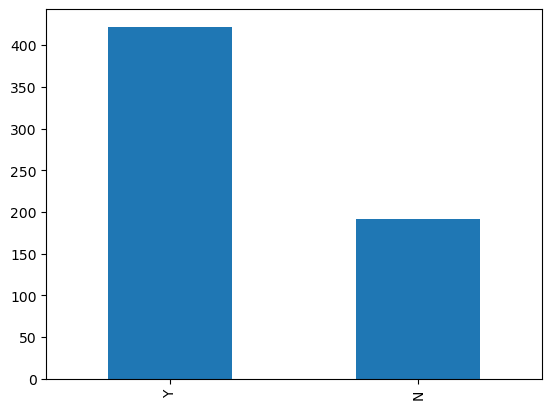

In [230]:
train['Loan_Status'].value_counts().plot.bar()

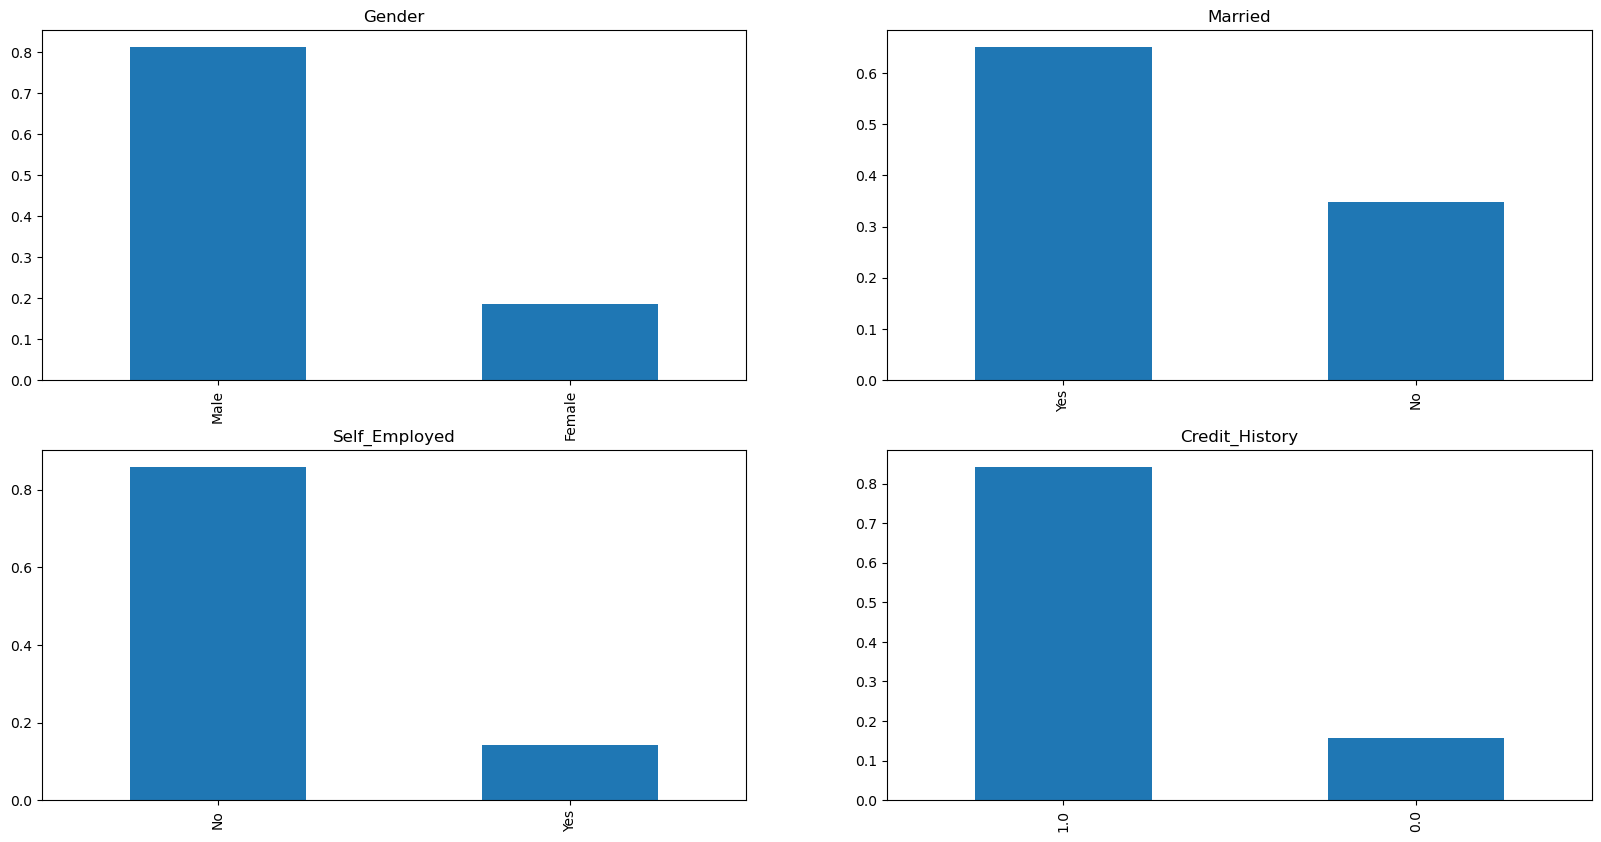

In [231]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= "Married")

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= "Credit_History")
plt.show()

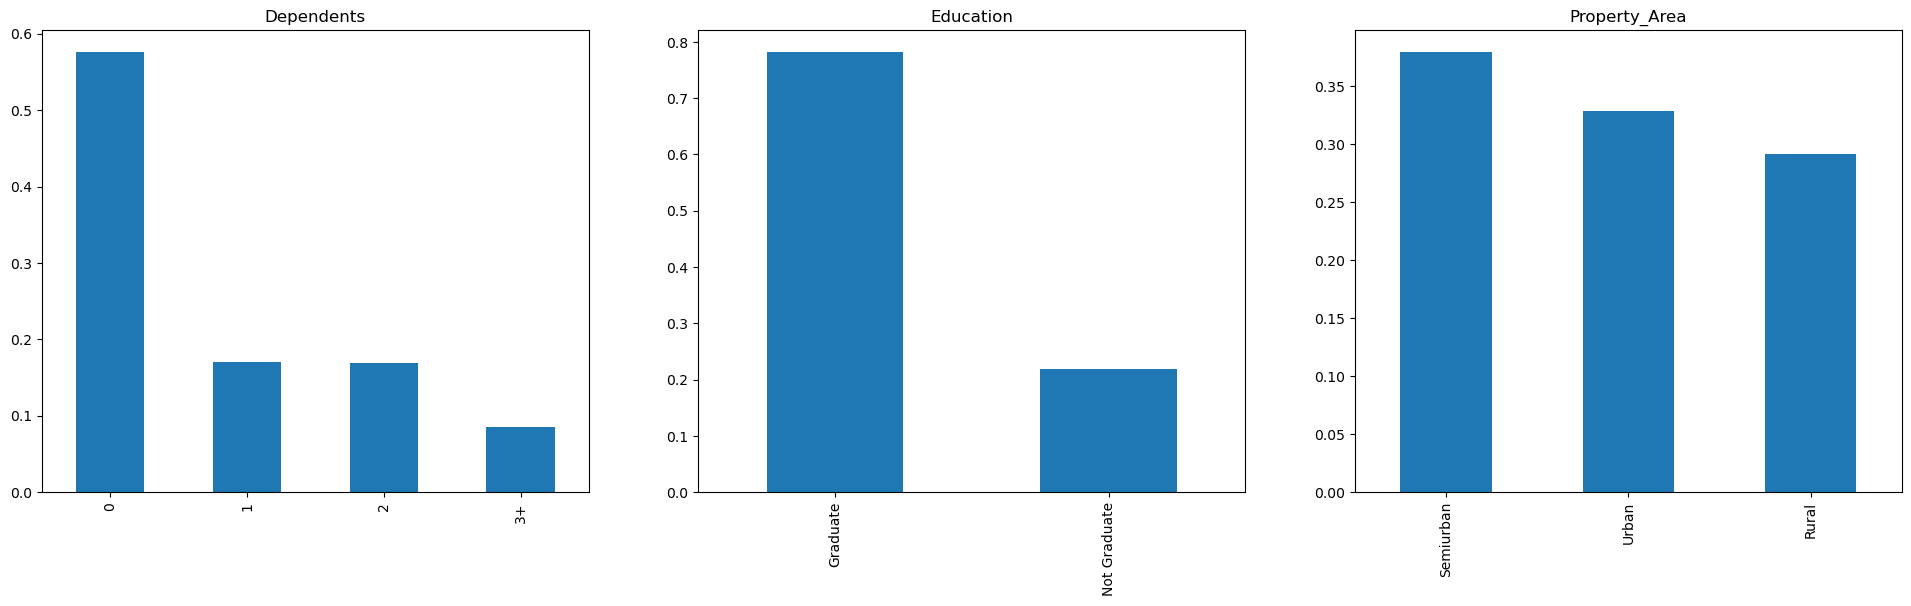

In [232]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= "Education")

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= "Property_Area")
plt.show()

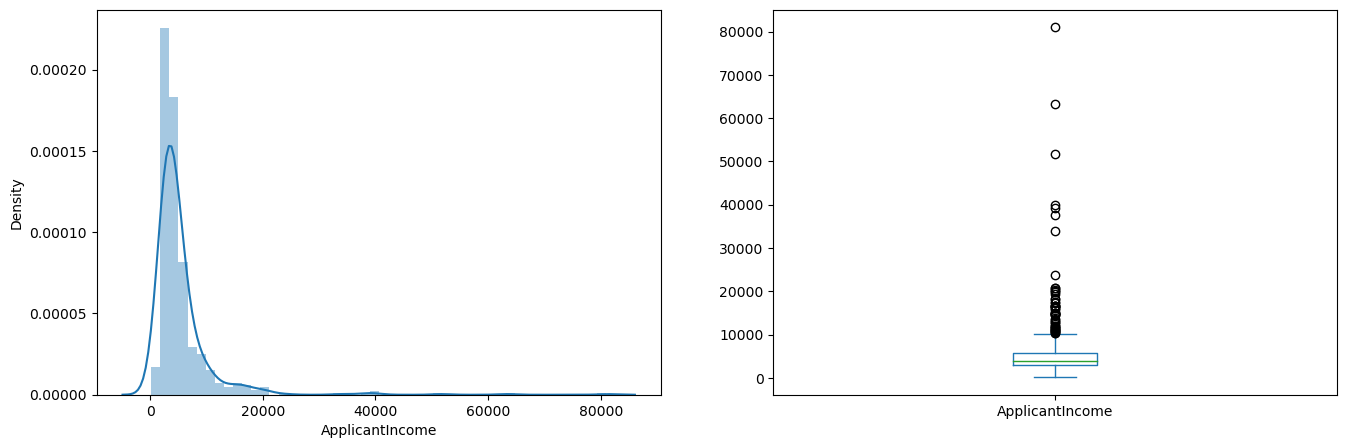

In [233]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

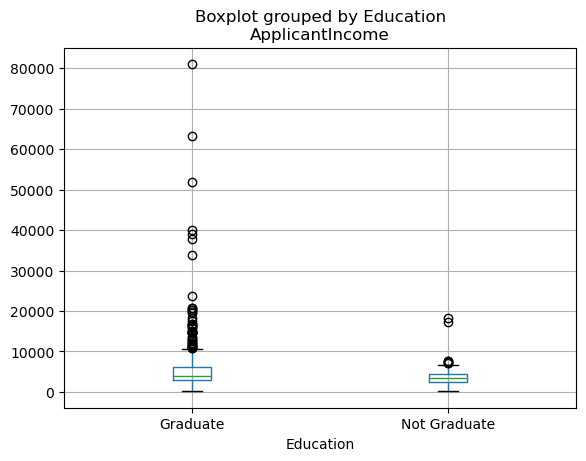

In [234]:
train.boxplot(column='ApplicantIncome', by = 'Education')

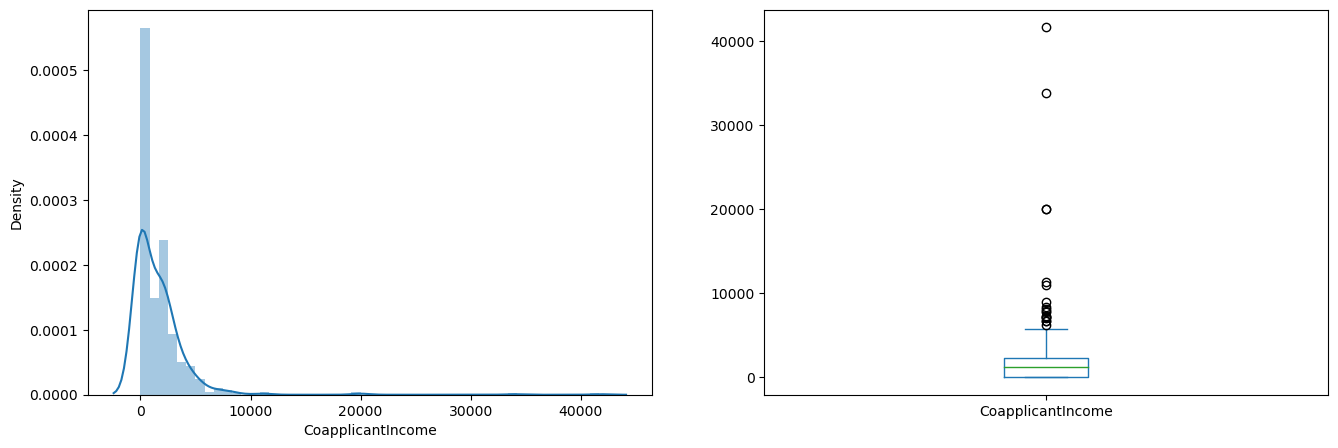

In [235]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

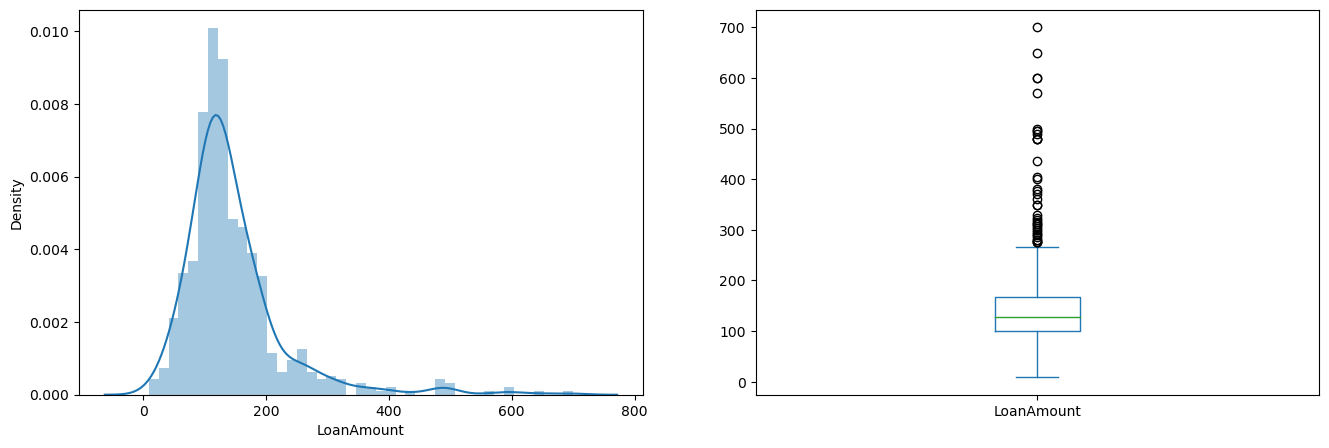

In [236]:
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Gender'>

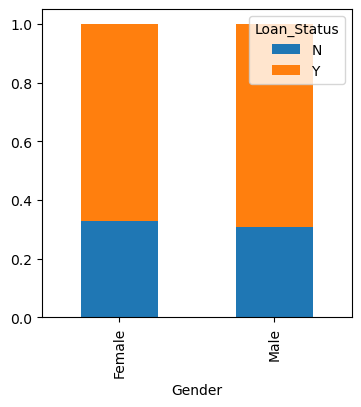

In [237]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))


<AxesSubplot:xlabel='Self_Employed'>

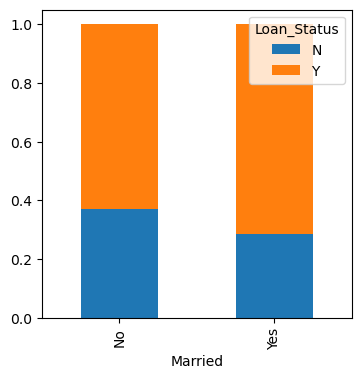

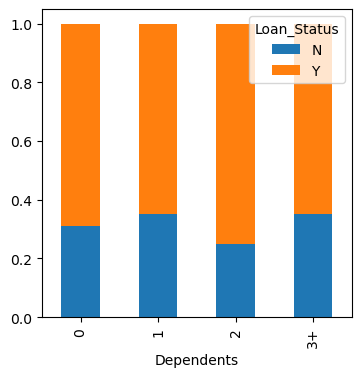

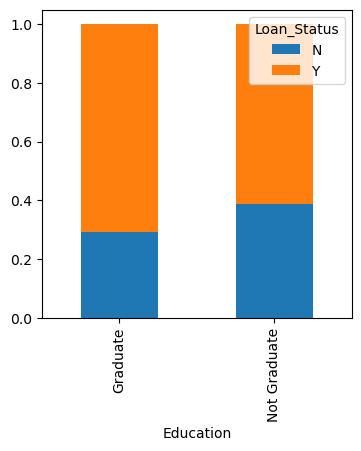

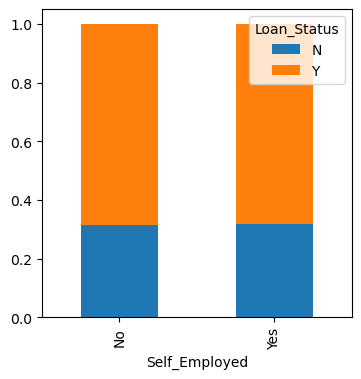

In [238]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Property_Area'>

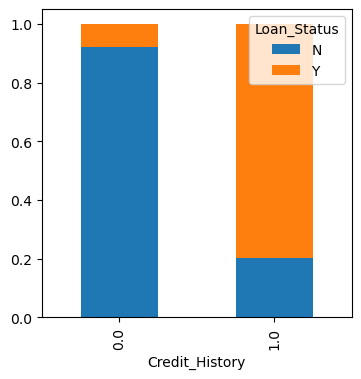

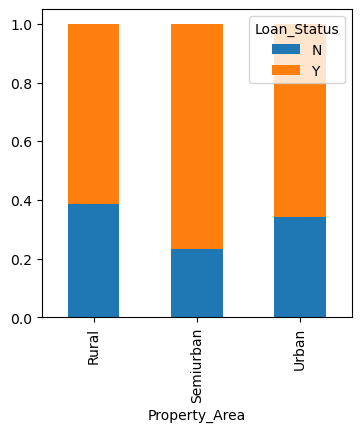

In [239]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Loan_Status'>

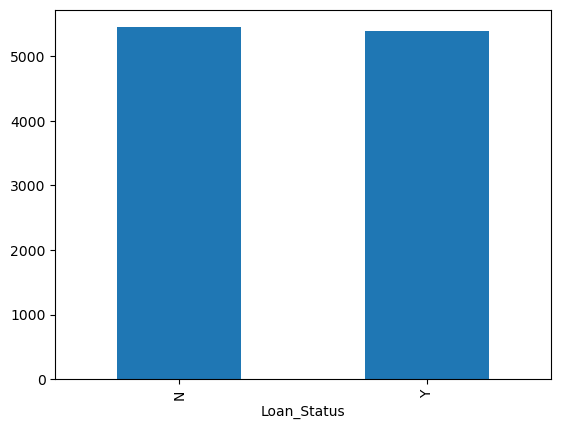

In [240]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

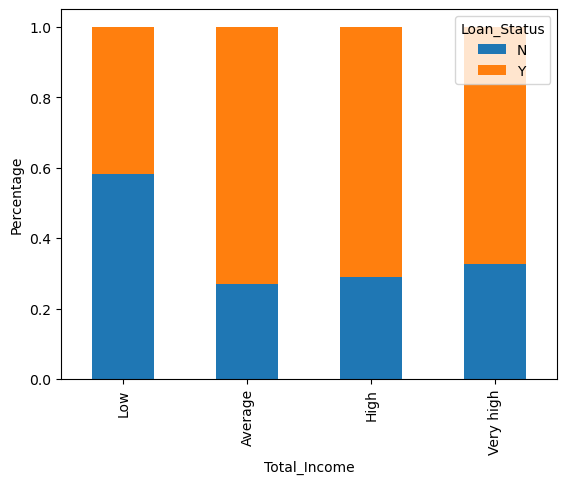

In [241]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

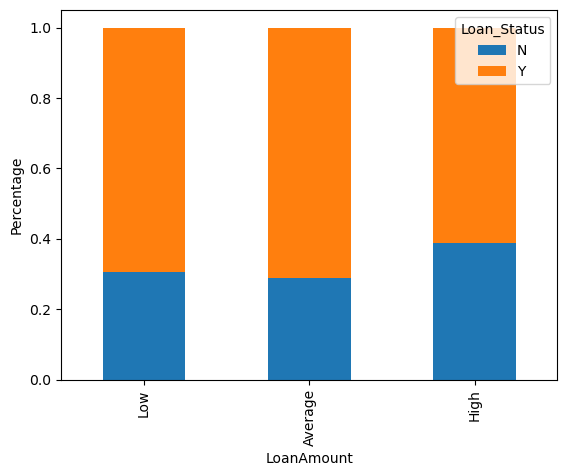

In [242]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [243]:
train = train.drop(['Total_Income_bin', 'Total_Income', 'LoanAmount_bin'], axis=1)

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

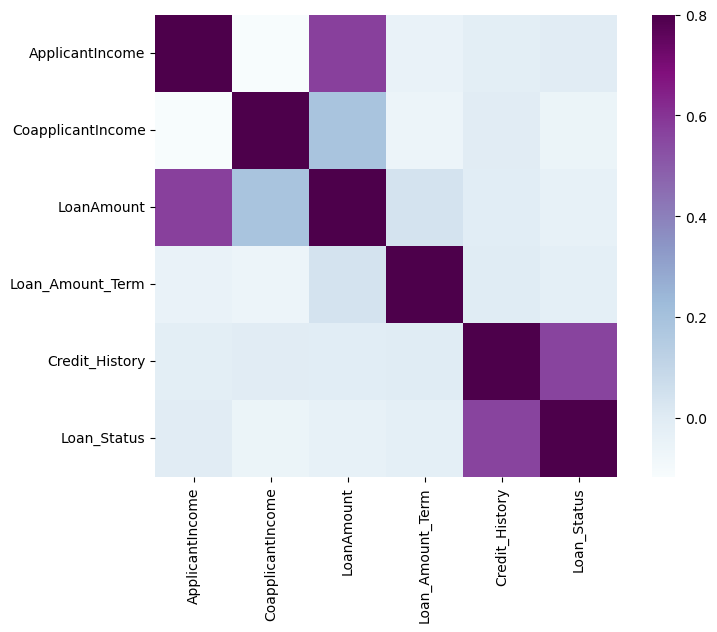

In [244]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [245]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [246]:
train['Gender'].fillna(train["Gender"].mode()[0], inplace=True)
train['Married'].fillna(train["Married"].mode()[0], inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0], inplace=True)
train['Self_Employed'].fillna(train["Self_Employed"].mode()[0], inplace=True)
train['Credit_History'].fillna(train["Credit_History"].mode()[0], inplace=True)

In [247]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [248]:
train['Loan_Amount_Term'].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

In [249]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [250]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [251]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [252]:
test['Gender'].fillna(train["Gender"].mode()[0], inplace=True)
test['LoanAmount'].fillna(train["LoanAmount"].median(), inplace=True)
test['Dependents'].fillna(train["Dependents"].mode()[0], inplace=True)
test['Self_Employed'].fillna(train["Self_Employed"].mode()[0], inplace=True)
test['Credit_History'].fillna(train["Credit_History"].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

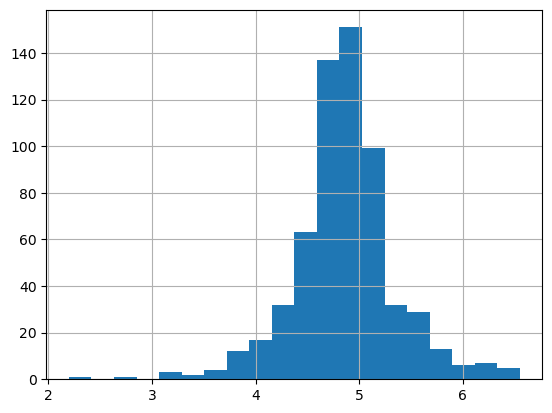

In [253]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [254]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [255]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [256]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [257]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                  intercept_scaling=1, max_iter=100, multi_class='ovr',
                  n_jobs=1, penalty='12', random_state=1, solver='liblinear',
                  tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [259]:
pred_cv = model.predict(X_cv)

In [260]:
accuracy_score(y_cv,pred_cv)

0.7783783783783784

In [261]:
pred_test = model.predict(test)

In [262]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [263]:
submission['Loan_Status']=pred_test
submission['Loan_Status']=test_original['Loan_ID']

In [264]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [265]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [266]:
from sklearn.model_selection import StratifiedKFold

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy score 0.8048780487804879

2 of kfold5
accuracy score 0.8373983739837398

3 of kfold5
accuracy score 0.7804878048780488

4 of kfold5
accuracy score 0.7886178861788617

5 of kfold5
accuracy score 0.7950819672131147


In [267]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [268]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [269]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

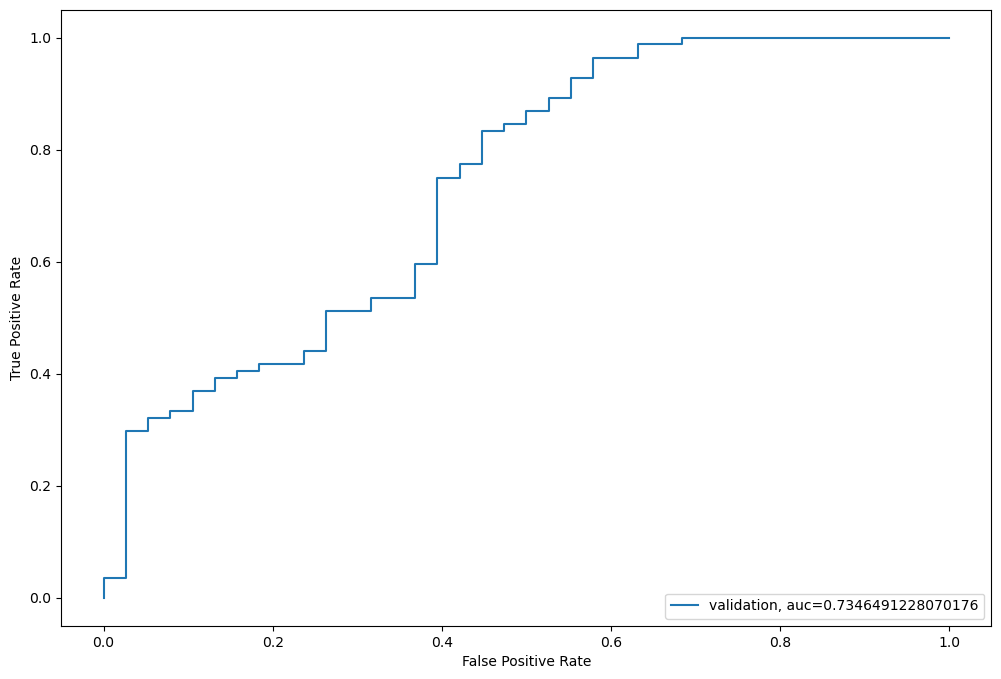

In [270]:
from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [271]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [272]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [273]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

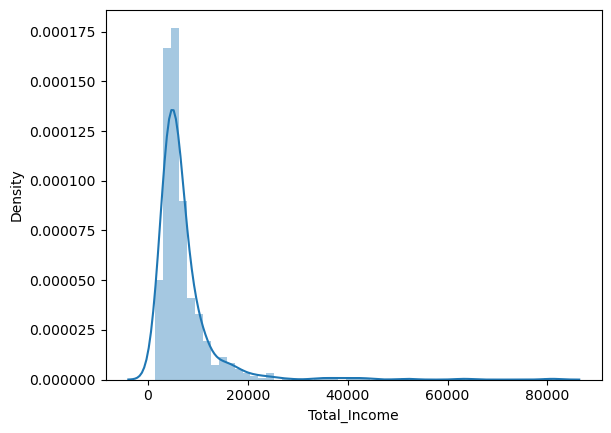

In [274]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

sns.distplot(train['Total_Income']);

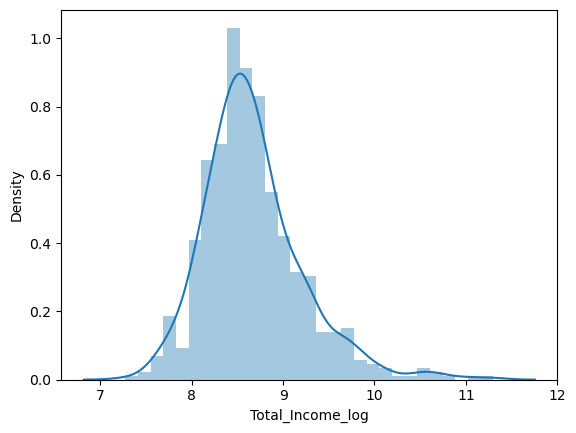

In [275]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

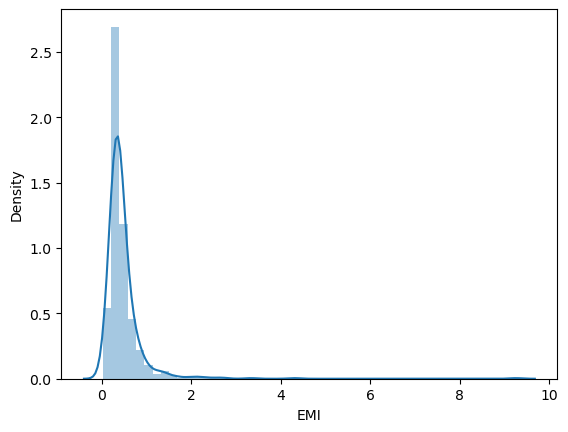

In [276]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

sns.distplot(train['EMI']);

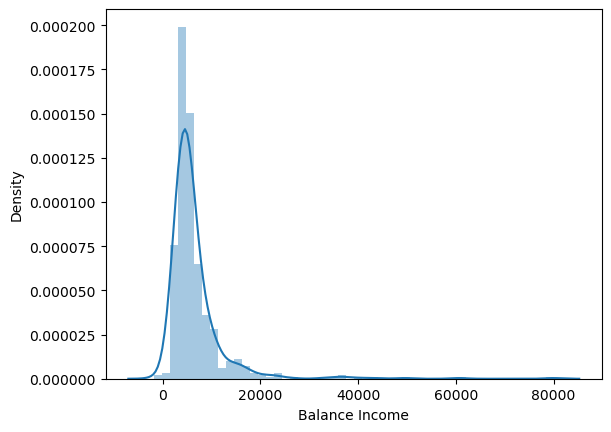

In [277]:
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

sns.distplot(train['Balance Income']);

In [278]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount',
                   'Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount',
                   'Loan_Amount_Term'],axis=1)

In [279]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

# Logistic Regression

In [280]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold5
accuracy score 0.7886178861788617

2 of kfold5
accuracy score 0.6910569105691057

3 of kfold5
accuracy score 0.6666666666666666

4 of kfold5
accuracy score 0.7804878048780488

5 of kfold5
accuracy score 0.680327868852459


In [281]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [282]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [283]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

# Decision Tree


In [284]:
from sklearn import tree

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    pred_test = model.predict(test)


1 of kfold5
accuracy score 0.7398373983739838

2 of kfold5
accuracy score 0.6991869918699187

3 of kfold5
accuracy score 0.7560975609756098

4 of kfold5
accuracy score 0.7073170731707317

5 of kfold5
accuracy score 0.6721311475409836


In [285]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [286]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [287]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

# Random Forest 

In [288]:
from sklearn.ensemble import RandomForestClassifier

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    pred_test = model.predict(test)


1 of kfold5
accuracy score 0.8292682926829268

2 of kfold5
accuracy score 0.8130081300813008

3 of kfold5
accuracy score 0.7723577235772358

4 of kfold5
accuracy score 0.8048780487804879

5 of kfold5
accuracy score 0.7540983606557377


In [289]:
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators': list(range(1,200,20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [290]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3,random_state=1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',estimator=RandomForestClassifier(bootstrap=True,
                                                                          class_weight=None,criterion='gini',max_depth=None,
                                                                          max_features='auto',max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,min_samples_leaf=1,
                                                                          min_samples_split=2,min_weight_fraction_leaf=0.0,
                                                                          n_estimators=10,n_jobs=1,verbose=0,warm_start=False),
            n_jobs=1,param_grid={'max_depth': [1,3,5,7,9,11,13,5,17,19],'n_estimators': [1,21,41,81,101,121,141,161,181]},
            pre_dispatch='2*n_jobs', refit=True,return_train_score='warn',scoring=None,verbose=0)


GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 5, 17, 19],
                         'n_estimators': [1, 21, 41, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [291]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [292]:
RandomForestClassifier(bootstrap=True,class_weight=None,criterion='gini',
                       max_depth=5,max_features='auto',max_leaf_nodes=None,
                       min_impurity_decrease=0.0,min_samples_leaf=1,
                       min_samples_split=2,min_weight_fraction_leaf=0.0,
                       n_estimators=41,n_jobs=1,verbose=0,warm_start=False)                                                                      

RandomForestClassifier(max_depth=5, n_estimators=41, n_jobs=1)

In [293]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    pred_test = model.predict(test)
    pred2 = model.predict_proba(test)[:,1]


1 of kfold5
accuracy score 0.8211382113821138

2 of kfold5
accuracy score 0.8373983739837398

3 of kfold5
accuracy score 0.7804878048780488

4 of kfold5
accuracy score 0.7804878048780488

5 of kfold5
accuracy score 0.7868852459016393


In [294]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [295]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [296]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random forest.csv')

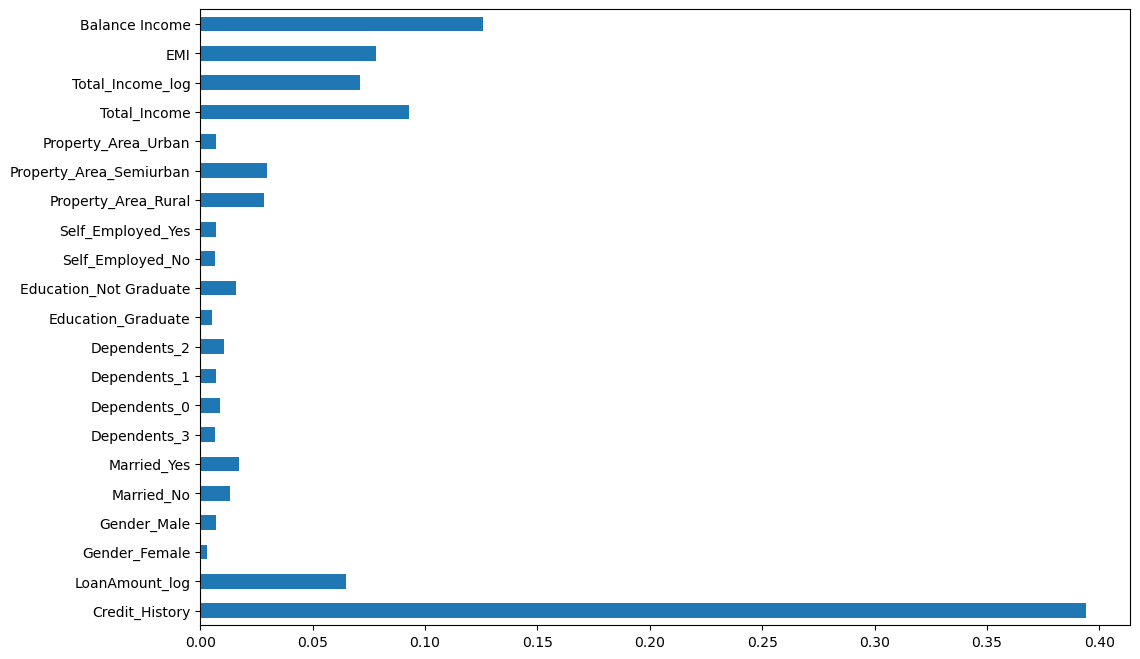

In [297]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh',figsize=(12,8));

# XGBOOST

In [298]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [299]:
from xgboost import XGBClassifier

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(max_depth=4, n_estimators=50)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy score',score)
    i+=1
    pred_test = model.predict(test)
    pred2 = model.predict_proba(test)[:,1]


1 of kfold5
accuracy score 0.7804878048780488

2 of kfold5
accuracy score 0.7886178861788617

3 of kfold5
accuracy score 0.7642276422764228

4 of kfold5
accuracy score 0.7804878048780488

5 of kfold5
accuracy score 0.7622950819672131


In [300]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [301]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [302]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')